<a href="https://colab.research.google.com/github/HariPrabu741/LGMVIP-DataScience/blob/main/MNIST_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing packages
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Loading dataset
mnist = tf.keras.datasets.mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
ytrain[0:4]

array([5, 0, 4, 1], dtype=uint8)

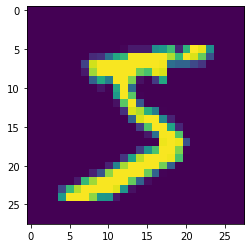

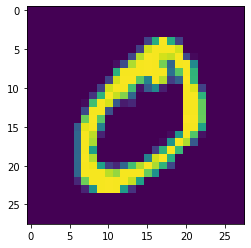

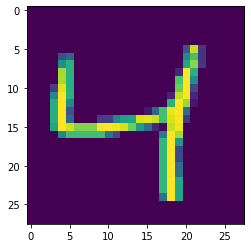

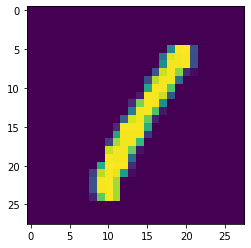

In [4]:
for i in range(4):
  plt.imshow(xtrain[i])
  plt.show()

In [5]:
# Printing shape of data
print('Shape of xtrain data is {}'.format(xtrain.shape))
print('Shape of ytrain labels is {}'.format(ytrain.shape))
print('Shape of xtest data is {}'.format(xtest.shape))
print('Shape of ytest labels is {}'.format(ytest.shape))

Shape of xtrain data is (60000, 28, 28)
Shape of ytrain labels is (60000,)
Shape of xtest data is (10000, 28, 28)
Shape of ytest labels is (10000,)


In [6]:
# Visually analyse the 1st image data ---- values will be between (0 - 255), so normalization should be done for easy learning
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
# Normalizing the data
xtrain = xtrain/255
xtest = xtest/255
xtrain[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=8)

Epoch 1/8
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2058 - accuracy: 0.9396 - val_loss: 0.1199 - val_accuracy: 0.9619
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0861 - accuracy: 0.9735 - val_loss: 0.0867 - val_accuracy: 0.9731
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0599 - accuracy: 0.9802 - val_loss: 0.0730 - val_accuracy: 0.9753
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0436 - accuracy: 0.9865 - val_loss: 0.0751 - val_accuracy: 0.9762
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0344 - accuracy: 0.9891 - val_loss: 0.0680 - val_accuracy: 0.9799
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0277 - accuracy: 0.9910 - val_loss: 0.0740 - val_accuracy: 0.9799
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0912 - val_accuracy: 0.9757

In [10]:
pred = xtest[0:10000:500]
act_label = ytest[0:10000:500]
act_label

array([7, 3, 9, 7, 6, 2, 6, 4, 9, 9, 3, 4, 9, 5, 1, 8, 4, 4, 7, 2],
      dtype=uint8)

In [11]:
pred.shape

(20, 28, 28)

In [12]:
ypred = model.predict(pred)

In [13]:
pred_label = []
for i in ypred:
  pred_label.append(np.argmax(i))
pred_label = np.array(pred_label)
pred_label

array([7, 3, 9, 7, 6, 2, 6, 4, 9, 9, 3, 4, 9, 5, 1, 8, 4, 4, 7, 2])

In [14]:
print('Actual label for testing data is {}'.format(act_label))
print('\nPredicted label for testing data is {}'.format(pred_label))

Actual label for testing data is [7 3 9 7 6 2 6 4 9 9 3 4 9 5 1 8 4 4 7 2]

Predicted label for testing data is [7 3 9 7 6 2 6 4 9 9 3 4 9 5 1 8 4 4 7 2]


In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
confusion_matrix(act_label,pred_label)

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 4]])

In [17]:
import seaborn as sns

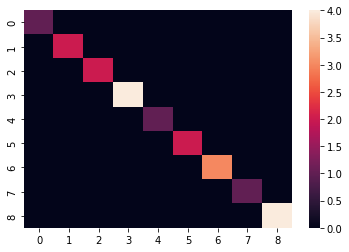

In [18]:
sns.heatmap(confusion_matrix(act_label,pred_label))